<a href="https://colab.research.google.com/github/sames12421/Advertising_Performances-/blob/main/Advertising_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l1_l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("/content/ad_campaign_performance.csv")

In [ ]:
dataset.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [ ]:
list1 = ["Campaign_ID","Target_Age","Target_Gender","Region"]
for i in list1:
  dataset.drop(i,axis=1,inplace=True)

dataset.head()
HE=OneHotEncoder()

In [ ]:
list2=["Platform","Content_Type"]
for i in list2:
  dataset[i]=HE.fit_transform(dataset[[i]]).toarray()
dataset.head()

,Budget,Duration,Platform,Content_Type,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,15895,39,0.0,0.0,48297,2116,303.850267,0.329109,4.381225,1
1,960,8,0.0,0.0,15097,2340,1572.604167,0.063589,15.499768,1
2,38258,54,0.0,0.0,8134,2740,21.260913,4.703467,33.685763,1
3,44832,28,1.0,0.0,21801,4277,48.628212,2.056419,19.618366,1
4,11384,36,0.0,0.0,16503,1488,144.966620,0.689814,9.016542,1


In [ ]:
X = dataset.drop('Success', axis=1)
y = dataset['Success']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

input_shape = X_train.shape[1]  # Get the number of features dynamically

In [ ]:
model = Sequential([
    Dense(10, activation='relu',  input_shape=(input_shape,)), # Dynamically set input_shape kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dropout(0.2),             #kernel_regularizer=l1_l2(l1=0.01, l2=0.01), for regularizer where it shows more error here
    Dense(10, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8240 - loss: 7271763456.0000 - val_accuracy: 0.9000 - val_loss: 0.6645
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8839 - loss: 0.6575 - val_accuracy: 0.9000 - val_loss: 0.6305
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8975 - loss: 0.6233 - val_accuracy: 0.9000 - val_loss: 0.6005
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9215 - loss: 0.5878 - val_accuracy: 0.9000 - val_loss: 0.5740
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9096 - loss: 0.5646 - val_accuracy: 0.9000 - val_loss: 0.5505
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8911 - loss: 0.5490 - val_accuracy: 0.9000 - val_loss: 0.5296
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8904 - loss: 0.5297 - val_accuracy: 0.9000 - val_loss: 0.5110
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9021 - loss: 0.5057 - val_accuracy: 0.9000 -

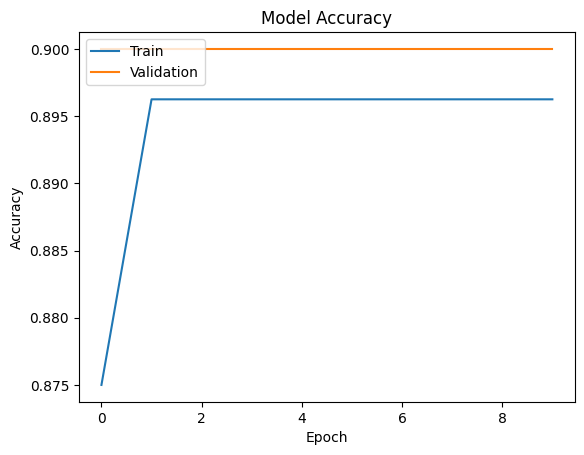

In [ ]:



plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# prompt: explain the code

This code trains a neural network model to predict the success of ad campaigns based on provided data. Let's break down the code step-by-step:

1. **Import Libraries:** The code begins by importing necessary libraries: TensorFlow (for the neural network), scikit-learn (for data preprocessing and splitting), NumPy and Pandas (for data manipulation), and Matplotlib (for plotting).

2. **Install Libraries:** It then uses pip to install the libraries, handling cases where they might not be present in the environment.  This is a good practice for making the code more portable.

3. **Load Dataset:** The code attempts to load a CSV file named "ad_campaign_performance.csv" into a Pandas DataFrame. It includes error handling in case the file is not found.

4. **Data Preprocessing:**
   - **Drop Columns:** Several columns (`Campaign_ID`, `Target_Age`, `Target_Gender`, `Region`) are dropped from the dataset. These are likely identifiers or features deemed irrelevant for the prediction task.
   - **One-Hot Encoding:**  Categorical features (`Platform` and `Content_Type`) are converted into numerical representations using one-hot encoding. This transforms each category into a binary vector.

5. **Data Splitting:** The dataset is split into training and testing sets using `train_test_split`.  `test_size=0.2` means 20% of the data is used for testing, and `random_state=42` ensures consistent splitting for reproducibility.

6. **Model Building:** A sequential neural network model is defined using Keras.
   - **Input Layer:** The input layer is dynamically sized to match the number of features in the dataset.
   - **Hidden Layers:**  Three dense hidden layers are used with ReLU activation functions. Dropout layers are added after each hidden layer to prevent overfitting.
   - **Output Layer:**  A single output node with a sigmoid activation function is used for binary classification (success or failure).

7. **Model Compilation:** The model is compiled with the following settings:
   - **Optimizer:** Stochastic Gradient Descent (`SGD`)
   - **Loss Function:** Binary cross-entropy (suitable for binary classification)
   - **Metrics:** Accuracy

8. **Model Training:** The model is trained using the training data (`X_train`, `y_train`).  The `validation_data` parameter specifies the test data to monitor the model's performance during training.

9. **Model Evaluation (Plotting):** Finally, the code plots the training and validation accuracy over epochs to visualize the model's learning progress.

**In Summary:** The code creates and trains a neural network model to predict ad campaign success based on various input features. The preprocessing steps handle categorical data, and the model architecture with dropout layers aims to improve performance and prevent overfitting. The visualization helps monitor training progress and identify potential issues like overfitting or underfitting.
